# $$ ASSIGNMENT - 2 $$

# Importing Libraries

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [64]:
import matplotlib.pyplot as plt

# Loading CSV Files
- train_data
- test_data
- varDescription

In [23]:
train_data = pd.read_csv('trainData.csv')
test_data = pd.read_csv('testData.csv')

# $$TASK -1 $$

### Cleaning $$TRAIN-DATA$$

In [24]:
train_data.columns

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [25]:
train_data.shape

(226067, 33)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211456 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226067 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225887 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226062 non-null  float64
 13  mths_since_las

In [27]:
(train_data.isnull().sum()/train_data.shape[0])*100

id                            100.000000
member_id                     100.000000
loan_amnt                       0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
emp_length                      6.463128
home_ownership                  0.000000
annual_inc                      0.000000
loan_status                     0.000000
dti                             0.079622
delinq_2yrs                     0.002212
inq_last_6mths                  0.002212
mths_since_last_delinq         51.241446
open_acc                        0.002212
pub_rec                         0.002212
revol_bal                       0.000000
revol_util                      0.084046
total_acc                       0.002212
total_pymnt                     0.000000
total_pymnt_inv                 0.000000
total_rec_prncp                 0.000000
total_rec_int                   0.000000
total_rec_late_fee              0.000000
recoveries      

In [28]:
train_data = train_data.drop(["id","member_id","mths_since_last_delinq"],axis=1)

In [29]:
train_data["loan_status"].value_counts()

loan_status
Fully Paid                                             104143
Current                                                 91999
Charged Off                                             26102
Late (31-120 days)                                       2215
In Grace Period                                           955
Late (16-30 days)                                         386
Does not meet the credit policy. Status:Fully Paid        201
Does not meet the credit policy. Status:Charged Off        60
Default                                                     6
Name: count, dtype: int64

In [30]:
train_data["y"] =train_data["loan_status"].apply(lambda x : 1 if x == "Charged Off" else 0 )
train_data.head(2)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,0.0,...,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0,0


In [31]:
train_data = train_data.drop("loan_status" , axis=1)

In [32]:
train_data.head(2)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,B,6 years,RENT,80000.0,12.92,0.0,0.0,...,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,10.62,1.0,2.0,...,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0,0


In [33]:
num_train = train_data.select_dtypes(exclude=['object'])
num_train.head(3)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,80000.0,12.92,0.0,0.0,8.0,0.0,13999,...,0.0,0.0,0.0,15705.09,0.0,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,55400.0,10.62,1.0,2.0,10.0,0.0,6524,...,0.0,0.0,0.0,72.28,0.0,0.0,74.0,351452.0,10800.0,0
2,12000,12.29,400.24,60000.0,17.92,0.0,0.0,14.0,0.0,14670,...,0.0,0.0,0.0,11281.15,0.0,0.0,0.0,18207.0,20600.0,0


In [34]:
cat_train = train_data.select_dtypes(include=['object'])
cat_train.head(3)

,grade,emp_length,home_ownership,application_type
0,B,6 years,RENT,Individual
1,D,4 years,MORTGAGE,Joint App
2,C,10+ years,OWN,Individual


In [42]:
(cat_train.isnull().sum()/cat_train.shape[0])*100

grade               0.000000
emp_length          6.463128
home_ownership      0.000000
application_type    0.000000
dtype: float64

In [45]:
cat_train["emp_length"] = cat_train["emp_length"].fillna(cat_train["emp_length"].mode()[0])

In [46]:
cat_train["grade"].value_counts()

grade
B    66392
C    65196
A    43206
D    32286
E    13593
F     4190
G     1204
Name: count, dtype: int64

In [47]:
cat_train["emp_length"].value_counts()

emp_length
10+ years    89424
2 years      20289
< 1 year     19011
3 years      18104
1 year       14939
5 years      14190
4 years      13575
6 years      10295
7 years       9206
8 years       9092
9 years       7942
Name: count, dtype: int64

In [53]:
cat_train["home_ownership"].value_counts()

home_ownership
MORTGAGE    111249
RENT         89614
OWN          25079
ANY            100
OTHER           18
NONE             7
Name: count, dtype: int64

In [57]:
cat_train["home_ownership"] = cat_train["home_ownership"].apply(lambda x: "OTHER" if x == "NONE" else x )

In [58]:
cat_train["home_ownership"].value_counts()

home_ownership
MORTGAGE    111249
RENT         89614
OWN          25079
ANY            100
OTHER           25
Name: count, dtype: int64

In [49]:
cat_train["application_type"].value_counts()

application_type
Individual    214066
Joint App      12001
Name: count, dtype: int64

In [62]:
new_cat_train = pd.get_dummies(cat_train).astype(int)
new_cat_train.head(2)

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,...,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [63]:
num_train.head(4)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,80000.0,12.92,0.0,0.0,8.0,0.0,13999,...,0.0,0.0,0.0,15705.09,0.0,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,55400.0,10.62,1.0,2.0,10.0,0.0,6524,...,0.0,0.0,0.0,72.28,0.0,0.0,74.0,351452.0,10800.0,0
2,12000,12.29,400.24,60000.0,17.92,0.0,0.0,14.0,0.0,14670,...,0.0,0.0,0.0,11281.15,0.0,0.0,0.0,18207.0,20600.0,0
3,16000,19.42,589.90,64000.0,3.90,1.0,0.0,5.0,0.0,7644,...,0.0,0.0,0.0,589.90,0.0,0.0,0.0,12293.0,7800.0,0


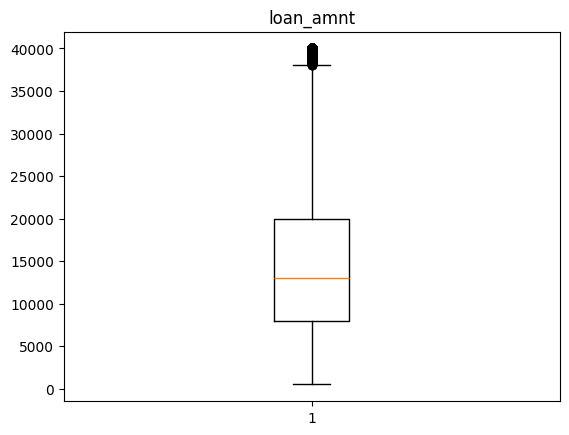

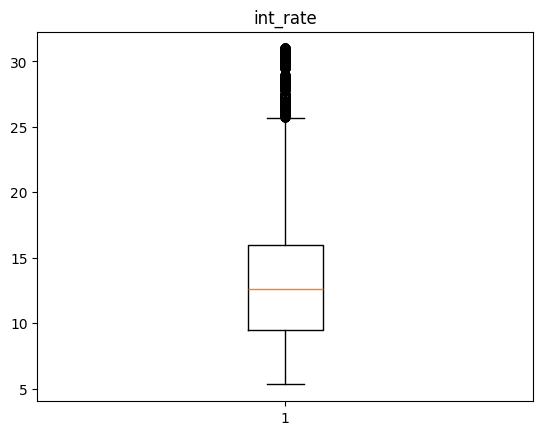

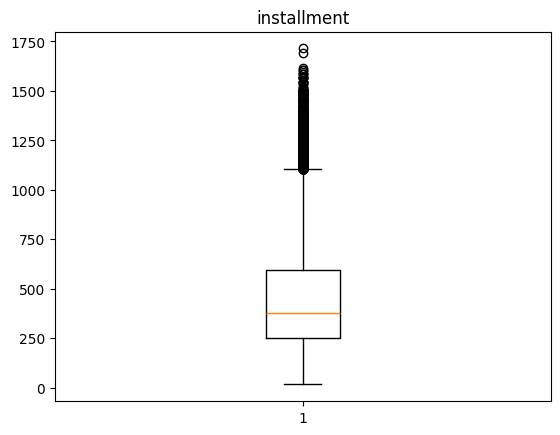

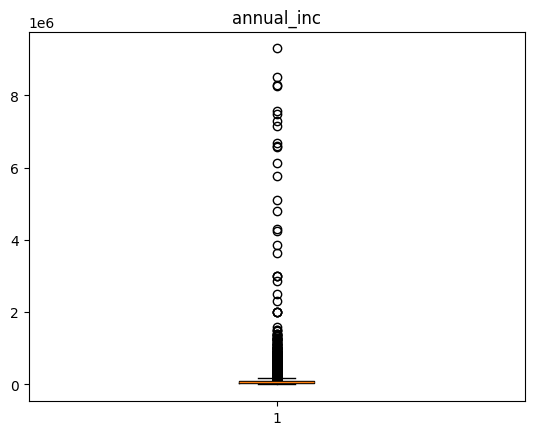

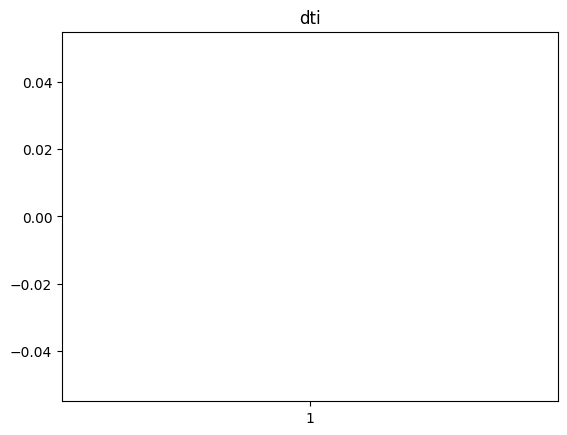

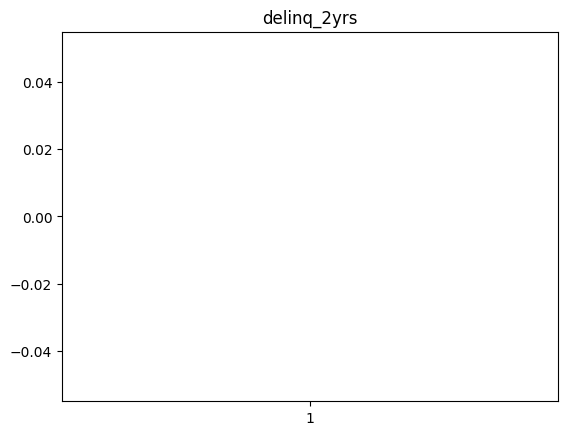

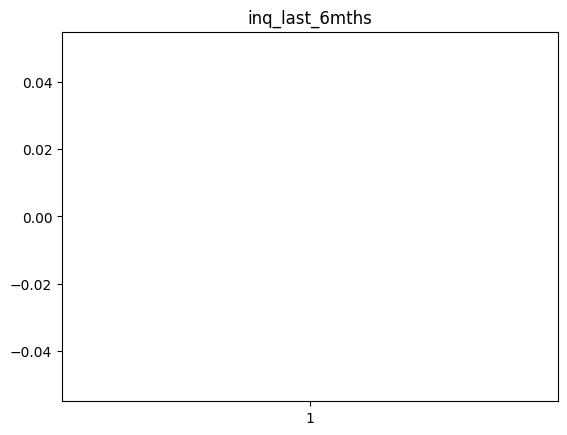

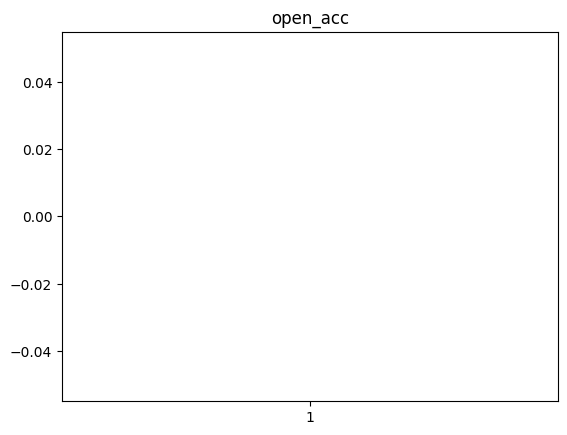

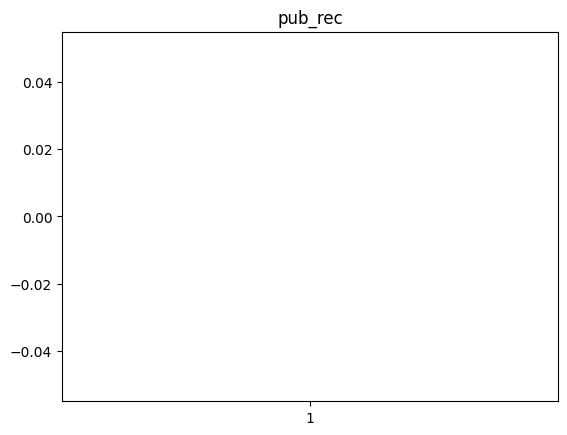

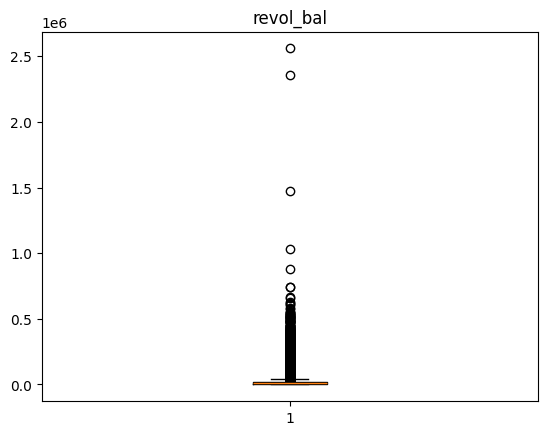

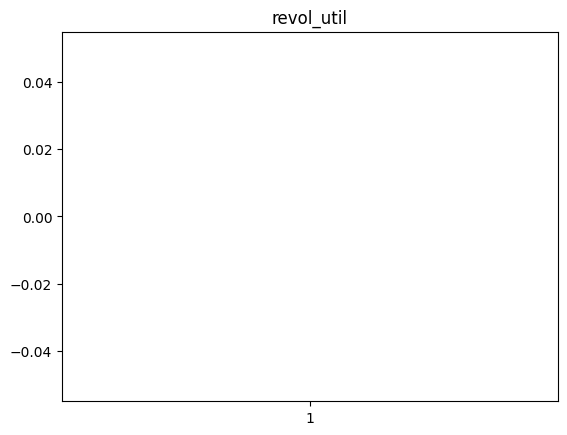

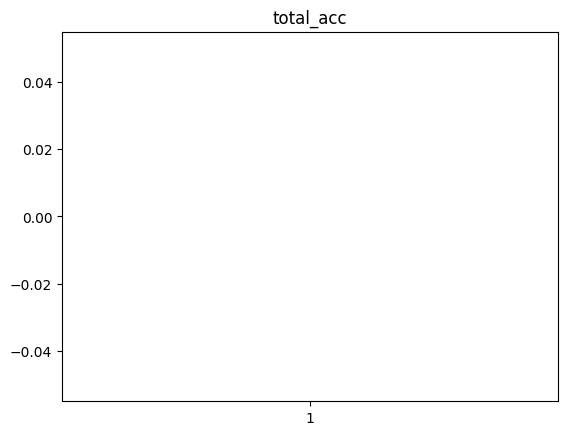

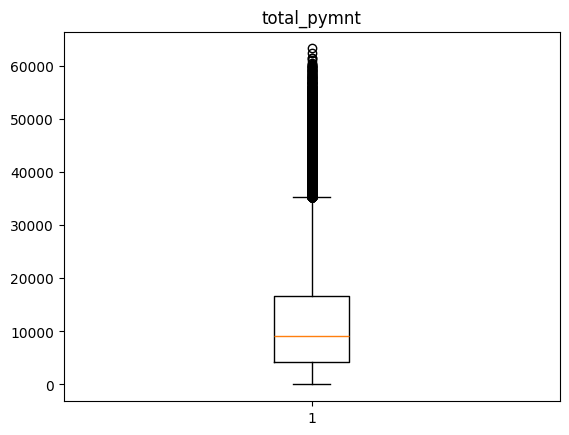

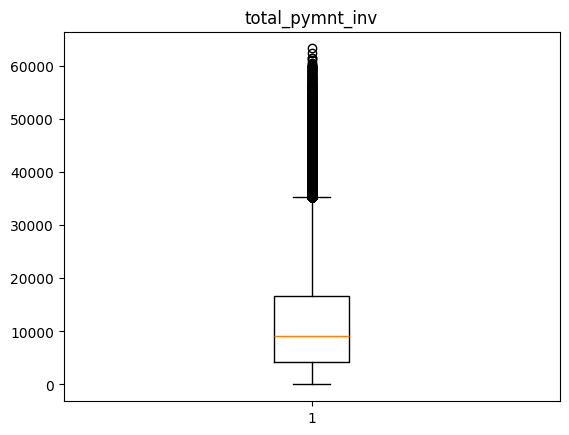

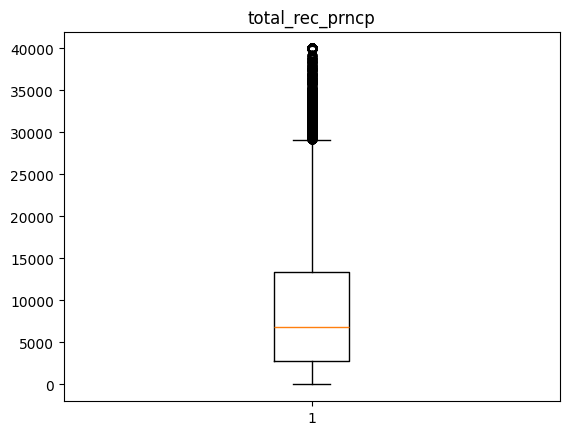

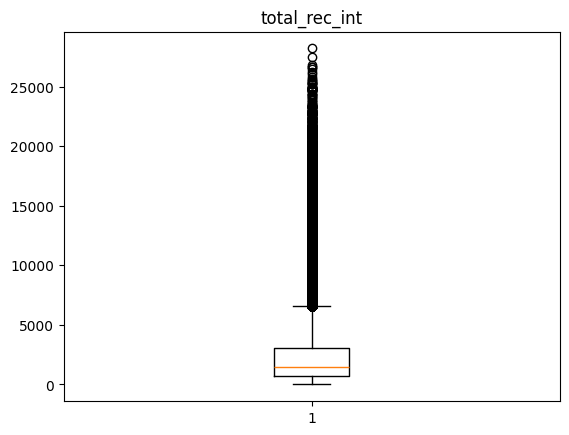

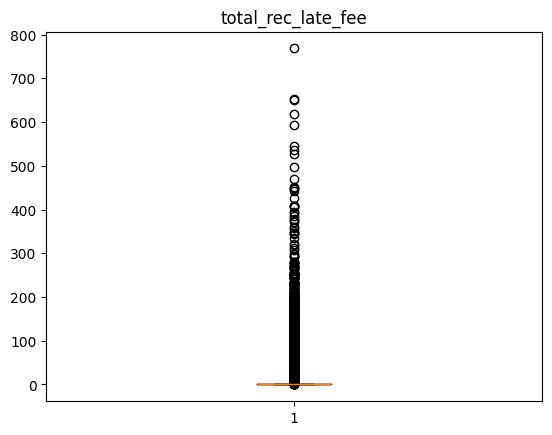

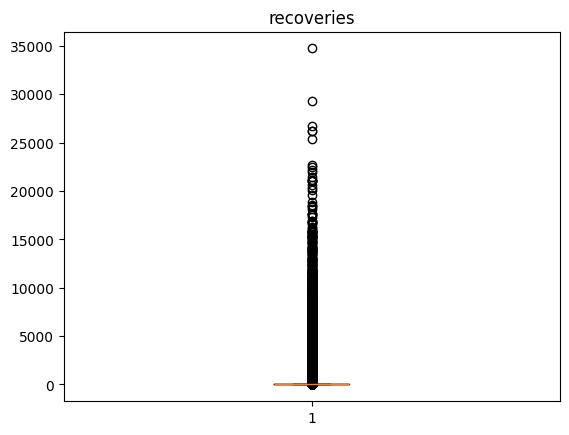

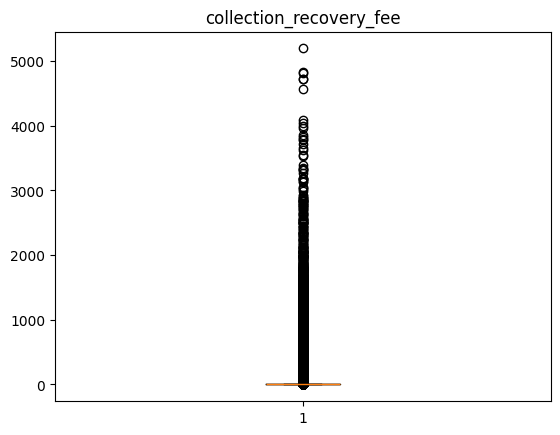

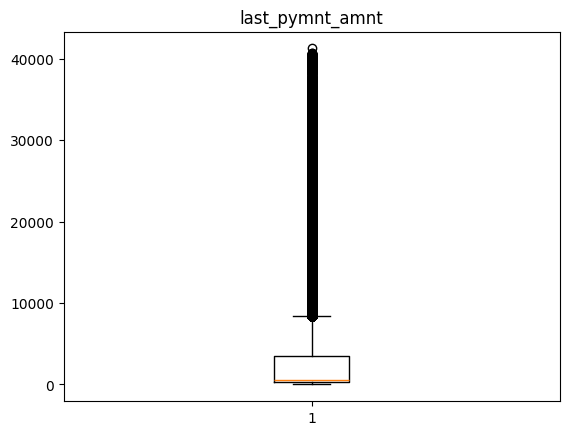

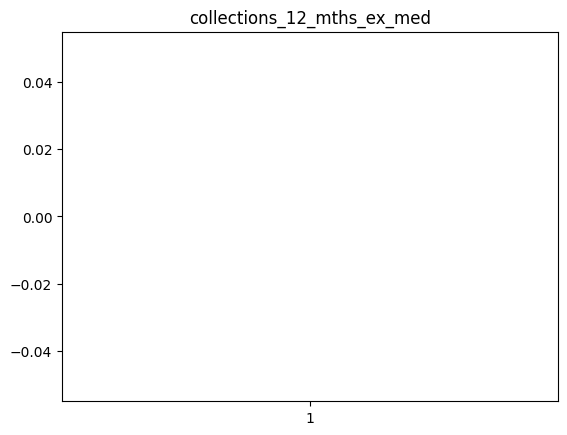

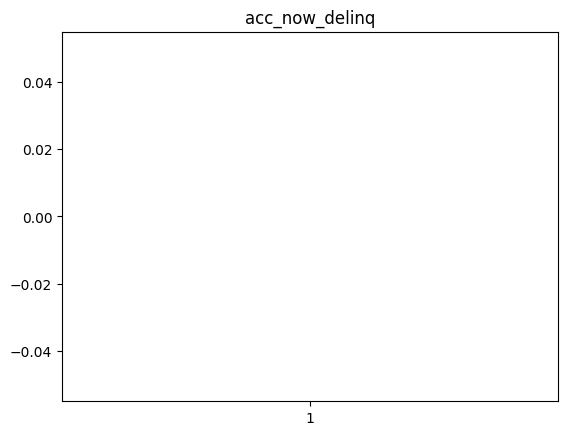

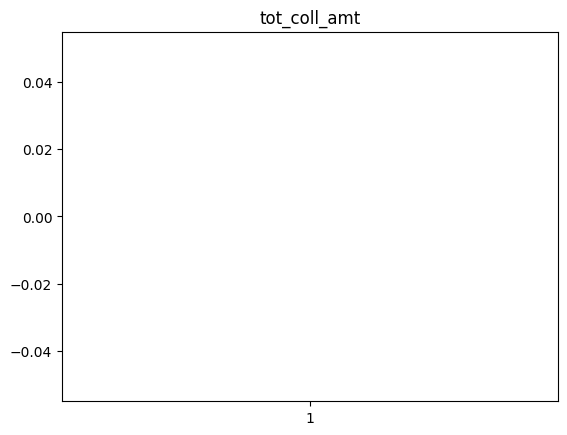

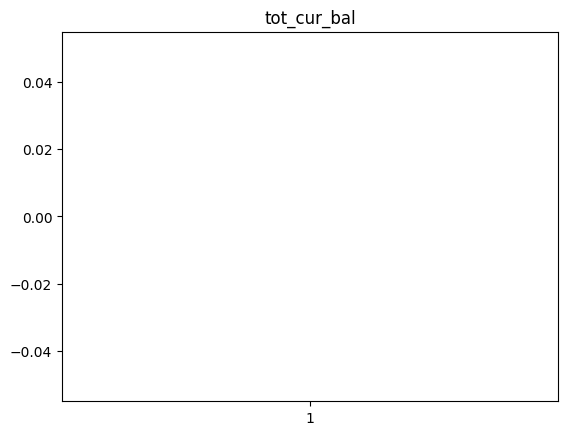

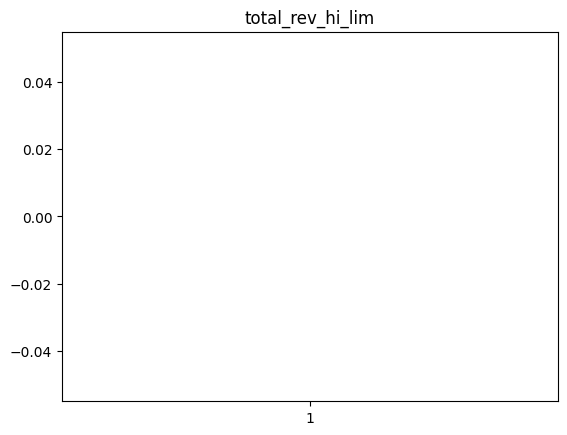

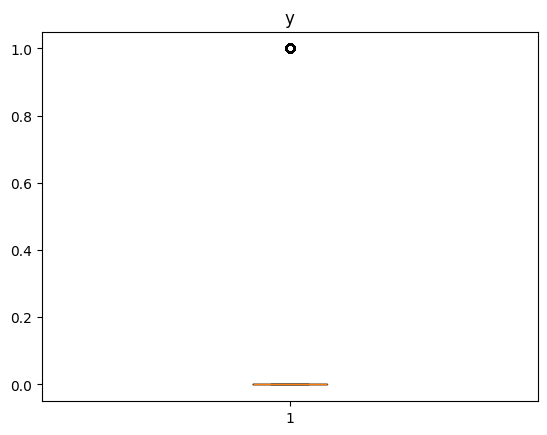

In [67]:
for i in num_train.columns:
      plt.boxplot(num_train[i])
      plt.title(i)
      plt.show()

In [69]:
num_train.head(10)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,80000.00,12.92,0.0,0.0,8.0,0.0,13999,...,0.0,0.00,0.0000,15705.09,0.0,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,55400.00,10.62,1.0,2.0,10.0,0.0,6524,...,0.0,0.00,0.0000,72.28,0.0,0.0,74.0,351452.0,10800.0,0
2,12000,12.29,400.24,60000.00,17.92,0.0,0.0,14.0,0.0,14670,...,0.0,0.00,0.0000,11281.15,0.0,0.0,0.0,18207.0,20600.0,0
3,16000,19.42,589.90,64000.00,3.90,1.0,0.0,5.0,0.0,7644,...,0.0,0.00,0.0000,589.90,0.0,0.0,0.0,12293.0,7800.0,0
4,22525,16.02,548.01,94080.00,19.08,1.0,0.0,15.0,0.0,20447,...,0.0,0.00,0.0000,21483.11,0.0,0.0,250.0,571244.0,53800.0,0
5,19000,16.99,472.10,65000.00,15.66,0.0,1.0,10.0,1.0,3557,...,0.0,1863.64,335.4552,472.10,0.0,0.0,234.0,13167.0,24600.0,1
6,6000,9.17,191.28,147000.00,4.00,1.0,1.0,8.0,3.0,2686,...,0.0,0.00,0.0000,152.92,0.0,0.0,381.0,2686.0,12400.0,0
7,17000,5.32,511.96,75000.00,7.89,0.0,0.0,8.0,0.0,195,...,0.0,0.00,0.0000,511.96,0.0,0.0,0.0,191633.0,45700.0,0
8,26375,24.50,766.43,71596.18,22.59,0.0,2.0,16.0,0.0,12408,...,0.0,0.00,0.0000,14426.38,0.0,0.0,510.0,273060.0,19900.0,0
9,10000,18.45,256.39,48000.00,28.03,0.0,1.0,33.0,0.0,5862,...,0.0,0.00,0.0000,256.39,0.0,0.0,0.0,132034.0,38100.0,0


In [77]:
temp_data = pd.concat([num_train,new_cat_train], axis=1)

In [78]:
def remove_out(d,cols):
    for i in cols:
        q1 = d[i].quantile(0.25)
        q3 = d[i].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5*iqr)
        high = q3 + (1.5*iqr)
        d = d[(d[i] >= low) & (d[i] <= high)]
        return d

In [79]:
combine_data = remove_out(temp_data,['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'y'])


In [82]:
combine_data.head(10)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,18600,10.99,608.86,80000.00,12.92,0.0,0.0,8.0,0.0,13999,...,0,0,0,0,0,0,0,1,1,0
1,2000,17.97,72.28,55400.00,10.62,1.0,2.0,10.0,0.0,6524,...,0,0,0,0,1,0,0,0,0,1
2,12000,12.29,400.24,60000.00,17.92,0.0,0.0,14.0,0.0,14670,...,0,0,0,0,0,0,1,0,1,0
3,16000,19.42,589.90,64000.00,3.90,1.0,0.0,5.0,0.0,7644,...,0,0,0,0,0,0,0,1,1,0
4,22525,16.02,548.01,94080.00,19.08,1.0,0.0,15.0,0.0,20447,...,0,0,0,0,1,0,0,0,1,0
5,19000,16.99,472.10,65000.00,15.66,0.0,1.0,10.0,1.0,3557,...,0,0,0,0,0,0,0,1,1,0
6,6000,9.17,191.28,147000.00,4.00,1.0,1.0,8.0,3.0,2686,...,0,0,0,0,0,0,1,0,1,0
7,17000,5.32,511.96,75000.00,7.89,0.0,0.0,8.0,0.0,195,...,0,0,0,0,1,0,0,0,1,0
8,26375,24.50,766.43,71596.18,22.59,0.0,2.0,16.0,0.0,12408,...,0,0,0,0,1,0,0,0,1,0
9,10000,18.45,256.39,48000.00,28.03,0.0,1.0,33.0,0.0,5862,...,0,0,0,0,0,0,0,1,1,0


In [86]:
combine_data[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,222551.000000,222551.000000,222551.000000,2.225510e+05,222383.000000,222546.000000,222546.000000,222546.000000,222546.000000,2.225510e+05,...,222551.000000,2.225510e+05,222551.000000,222551.000000,222551.000000,222535.000000,222546.000000,2.154440e+05,2.154440e+05,2.154440e+05
mean,14664.861313,13.123227,436.225233,7.710462e+04,18.784147,0.310039,0.581826,11.577144,0.201091,1.631831e+04,...,2364.654662,1.427783e+00,139.337034,23.164719,3332.705130,0.018087,0.004201,2.653137e+02,1.400701e+05,3.391264e+04
std,8695.801475,4.829927,255.335543,8.090130e+04,13.760273,0.866469,0.889304,5.623546,0.577938,2.178395e+04,...,2650.209245,1.083302e+01,739.645068,128.976352,5846.437444,0.152277,0.069698,1.979341e+04,1.559815e+05,3.373813e+04
min,500.000000,5.310000,16.310000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,-5.100000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,9.580000,250.740000,4.600000e+04,11.900000,0.000000,0.000000,8.000000,0.000000,5.901000e+03,...,685.325000,0.000000e+00,0.000000,0.000000,306.900000,0.000000,0.000000,0.000000e+00,2.885000e+04,1.450000e+04
50%,12500.000000,12.690000,374.140000,6.500000e+04,17.860000,0.000000,0.000000,11.000000,0.000000,1.124800e+04,...,1464.640000,0.000000e+00,0.000000,0.000000,574.810000,0.000000,0.000000,0.000000e+00,7.791500e+04,2.510000e+04
75%,20000.000000,15.990000,578.930000,9.200000e+04,24.500000,0.000000,1.000000,14.000000,0.000000,1.988500e+04,...,3016.625000,0.000000e+00,0.000000,0.000000,3588.285000,0.000000,0.000000,0.000000e+00,2.104530e+05,4.250000e+04
max,38000.000000,30.990000,1545.860000,9.300000e+06,999.000000,30.000000,16.000000,93.000000,49.000000,1.470945e+06,...,28192.500000,7.681700e+02,34740.400000,5192.990000,38782.550000,8.000000,5.000000,9.152545e+06,3.916686e+06,1.875800e+06


In [94]:
def out_liear(df,col):
    for i in col:
       high =  df[i].mean() + 3*df[i].std()
       low = df[i].mean() - 3*df[i].std()
       print(f"colmn name '{i}' and low is {low} and high is {high}")
       df = df[(df[i] > low) & (df[i] < high)]
    return df

In [95]:
v = out_liear(num_train,num_train.columns)
v.describe()

colmn name 'loan_amnt' and low is -12474.069758081469 and high is 42590.01171334252
colmn name 'int_rate' and low is -1.3882301805609956 and high is 27.56992728805568
colmn name 'installment' and low is -353.24585843652534 and high is 1242.555294744146
colmn name 'annual_inc' and low is -167681.80169093807 and high is 323106.46406650764
colmn name 'dti' and low is -22.95823344789992 and high is 60.56089824935949
colmn name 'delinq_2yrs' and low is -2.279471009098507 and high is 2.894280473855506
colmn name 'inq_last_6mths' and low is -2.0701481564585054 and high is 3.215729141799195
colmn name 'open_acc' and low is -5.266020609498408 and high is 28.30424564015011
colmn name 'pub_rec' and low is -1.5296800539821578 and high is 1.929527320287673
colmn name 'revol_bal' and low is -43751.512891330494 and high is 76065.51479770316
colmn name 'revol_util' and low is -23.923061696376188 and high is 124.47304845226284
colmn name 'total_acc' and low is -10.651762270728572 and high is 57.5640396

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
count,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,148891.000000,...,1.488910e+05,148891.0,148891.0,148891.000000,148891.0,148891.0,148891.000000,148891.000000,148891.000000,148891.0
mean,13236.630824,12.346644,394.080491,69649.771966,18.284809,0.190905,0.481010,10.895548,0.147846,13378.731146,...,2.225137e-01,0.0,0.0,2670.553388,0.0,0.0,203.055692,118000.582560,29224.022446,0.0
std,7886.066669,4.343386,224.350959,36920.881808,8.901569,0.473147,0.742333,4.871025,0.354949,11050.544726,...,1.998718e+00,0.0,0.0,4115.865884,0.0,0.0,1438.320839,119103.322257,20308.339092,0.0
min,1000.000000,5.310000,23.260000,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-3.900000e-09,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,7200.000000,9.160000,234.250000,45000.000000,11.700000,0.000000,0.000000,7.000000,0.000000,5634.000000,...,0.000000e+00,0.0,0.0,298.205000,0.0,0.0,0.000000,25803.500000,14100.000000,0.0
50%,12000.000000,11.990000,343.390000,61000.000000,17.590000,0.000000,0.000000,10.000000,0.000000,10471.000000,...,0.000000e+00,0.0,0.0,550.680000,0.0,0.0,0.000000,64538.000000,24000.000000,0.0
75%,18000.000000,14.990000,509.070000,85000.000000,24.240000,0.000000,1.000000,14.000000,0.000000,17758.000000,...,0.000000e+00,0.0,0.0,3416.995000,0.0,0.0,0.000000,186360.500000,39300.000000,0.0
max,40000.000000,27.490000,1242.460000,323000.000000,60.440000,2.000000,3.000000,28.000000,1.000000,76050.000000,...,2.695000e+01,0.0,0.0,18365.070000,0.0,0.0,67647.000000,537366.000000,103900.000000,0.0


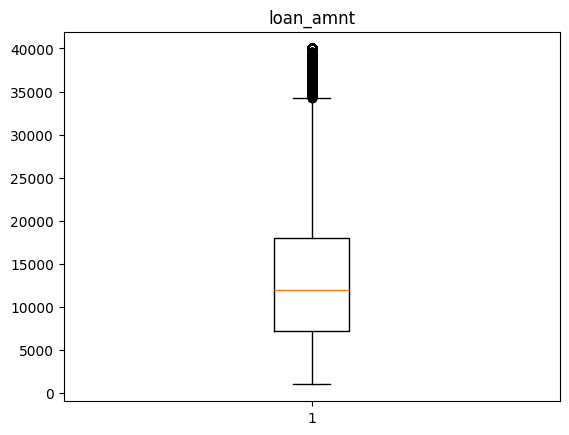

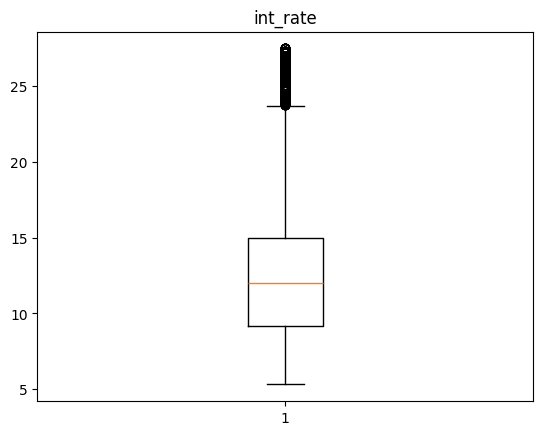

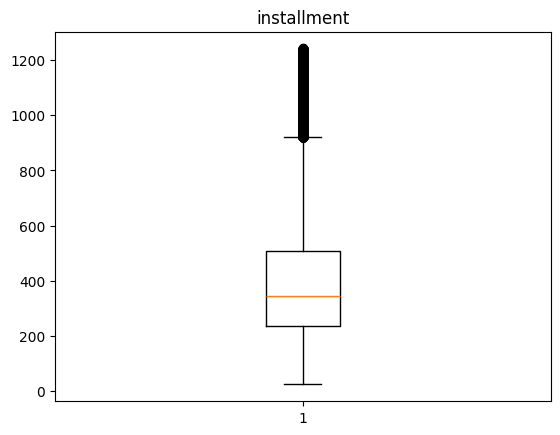

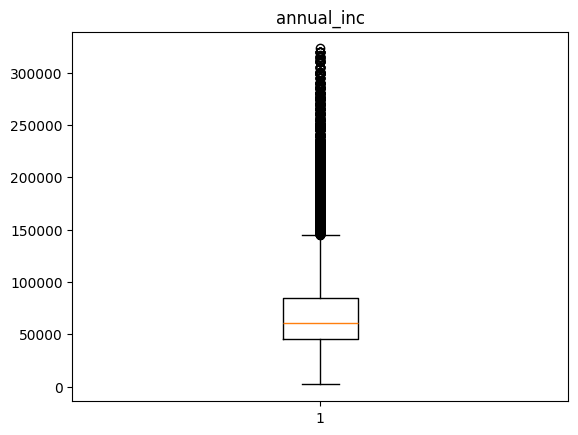

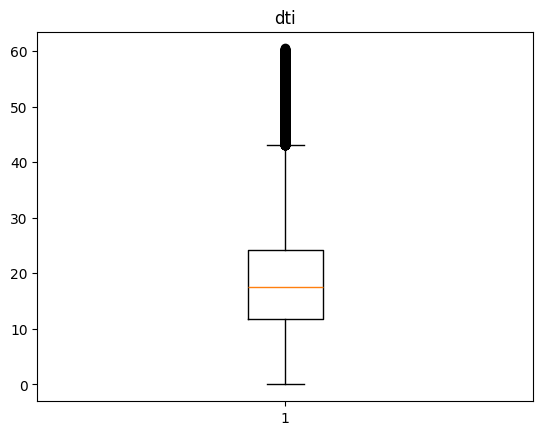

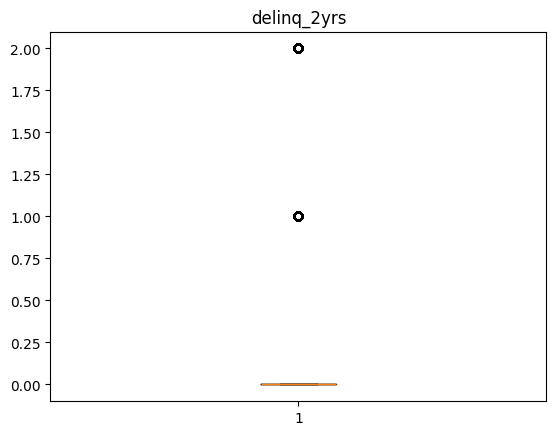

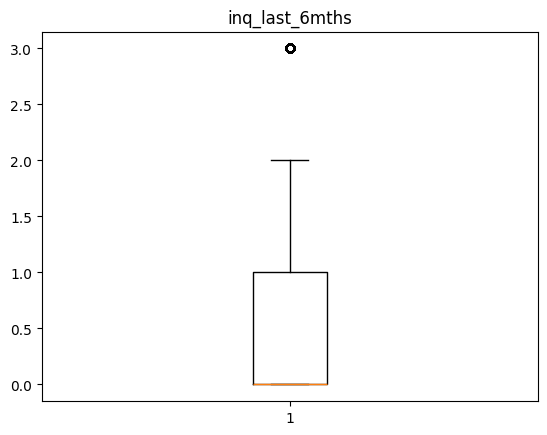

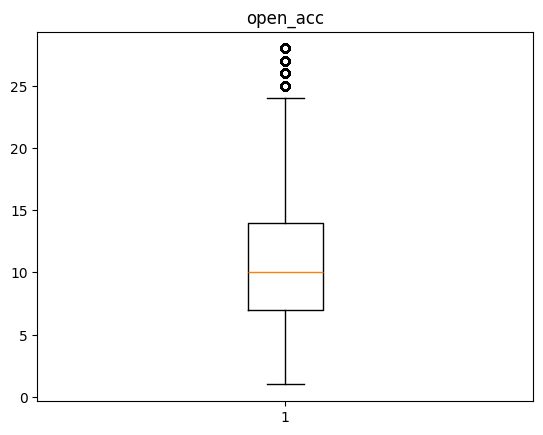

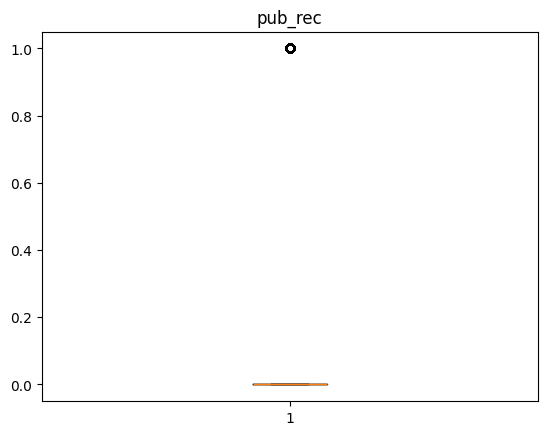

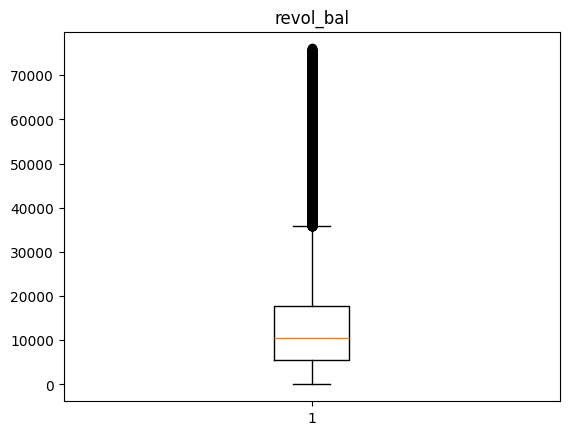

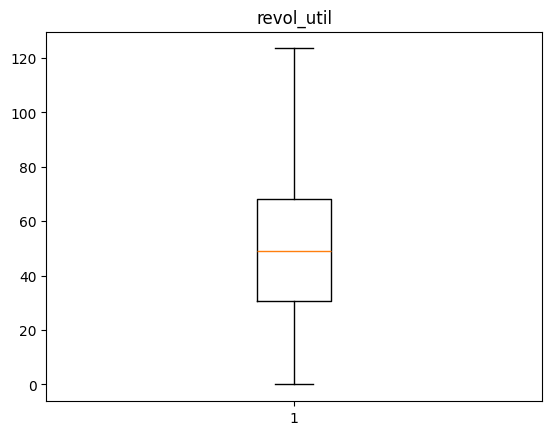

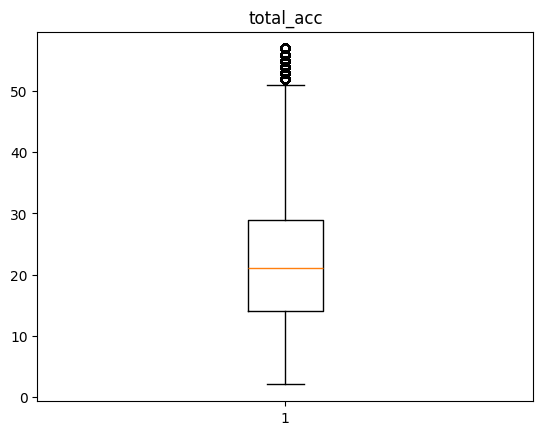

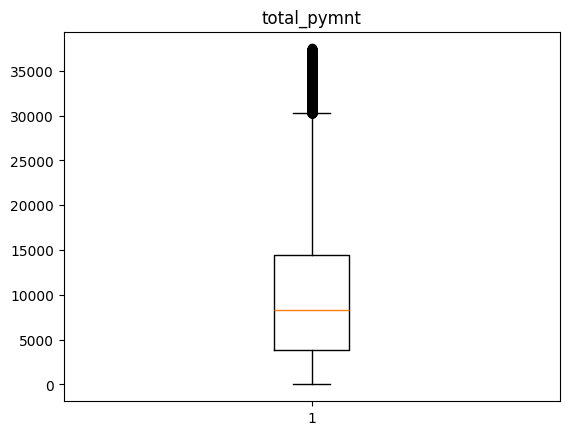

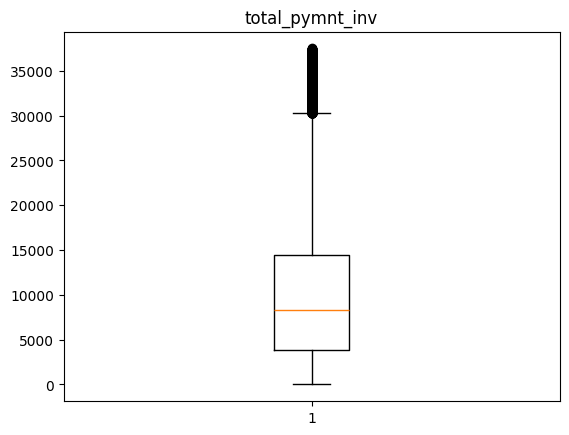

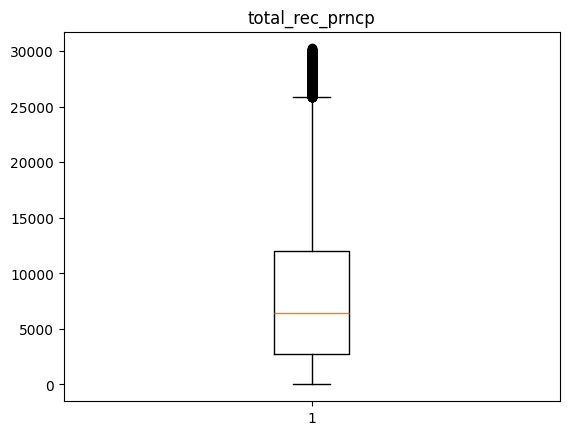

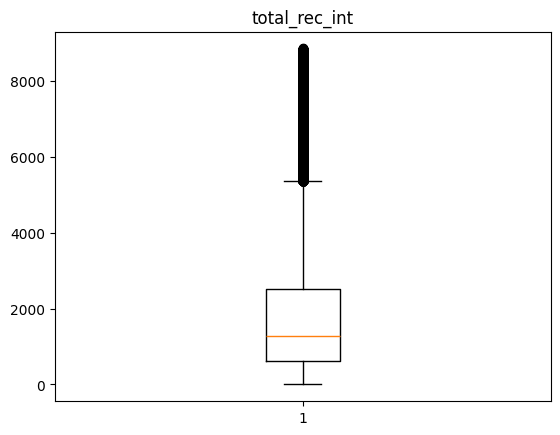

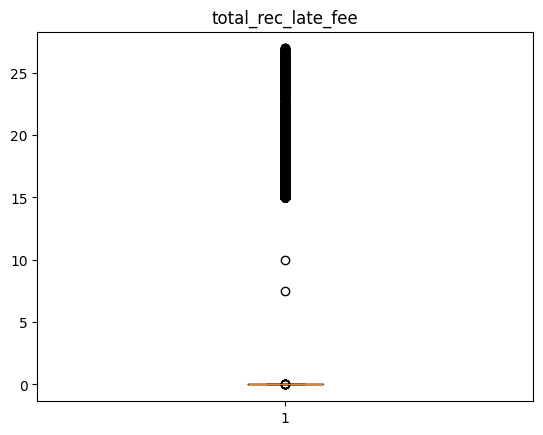

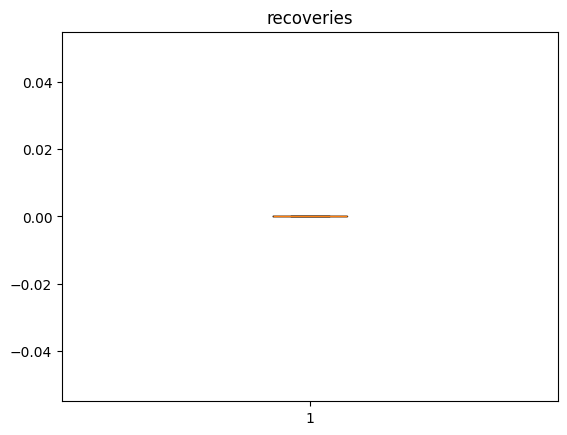

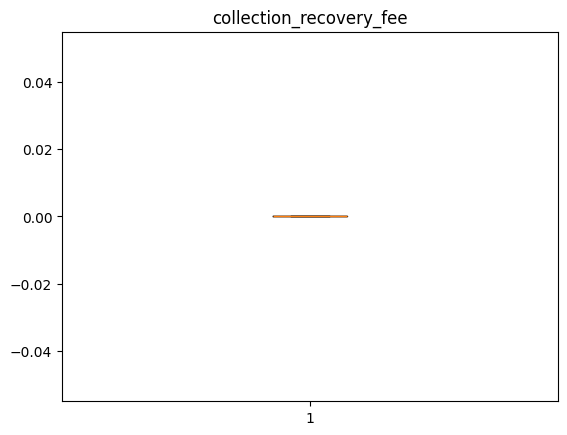

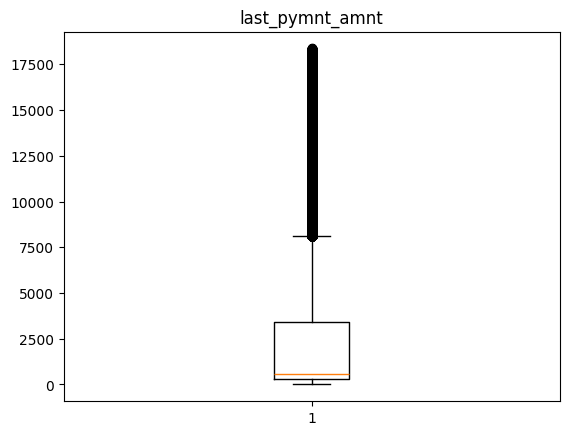

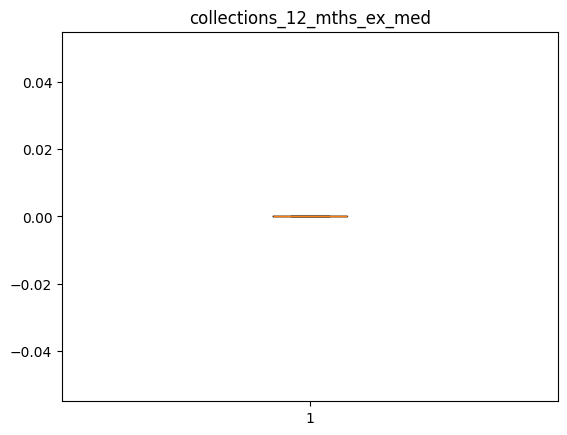

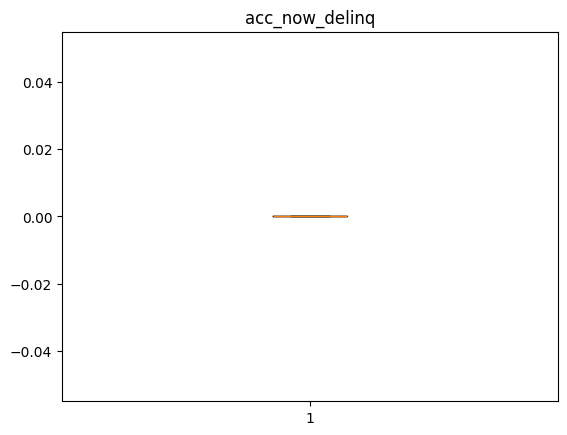

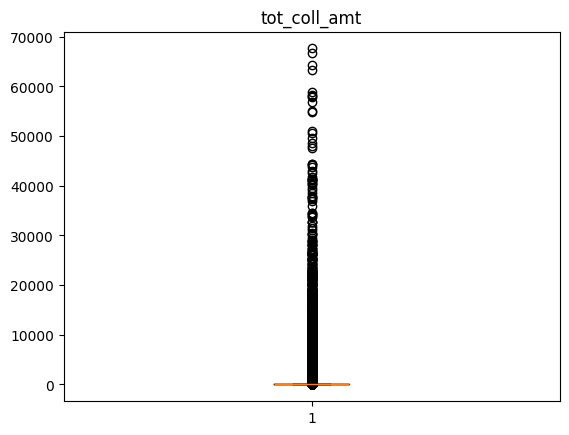

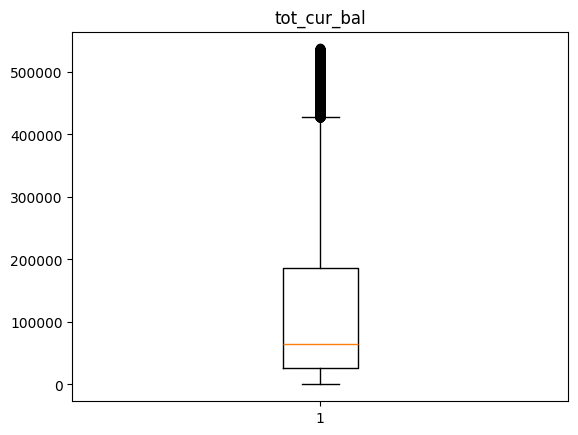

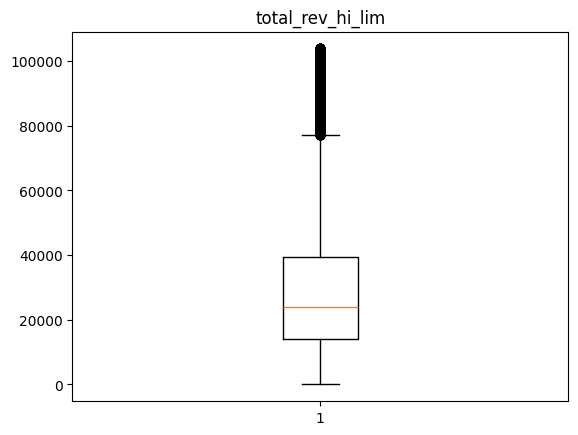

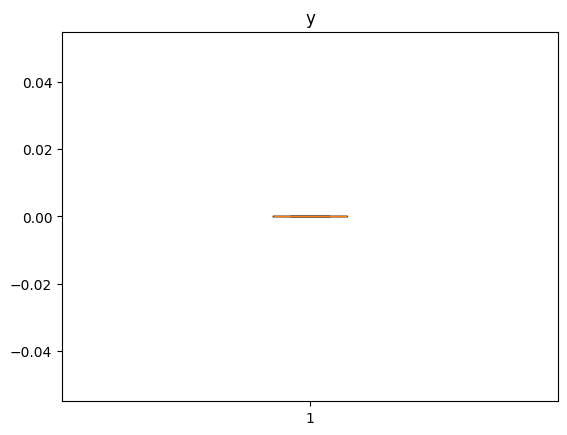

In [96]:
for i in v.columns:
    plt.boxplot(v[i])
    plt.title(i)
    plt.show()

In [89]:
train_data.dti=train_data.dti.fillna(train_data.dti.median())

In [90]:
train_data.dti.isnull().sum()

0

In [91]:
train_data.mths_since_last_delinq.isnull().sum()

115840

In [92]:
train_data.mths_since_last_delinq=train_data.mths_since_last_delinq.fillna(train_data.mths_since_last_delinq.median())

In [93]:
train_data.mths_since_last_delinq.isnull().sum()

0

In [94]:
train_data.revol_util=train_data.revol_util.fillna(train_data.revol_util.median())

In [95]:
train_data.revol_util.isnull().sum()

0

In [96]:
train_data = train_data.drop(columns=["id","member_id"])

In [97]:
train_data.emp_length =train_data.emp_length.fillna(train_data.emp_length.mode()[0])

In [98]:
train_data.emp_length .isnull().sum()

0

In [99]:
train_data.delinq_2yrs=train_data.delinq_2yrs.fillna(train_data.delinq_2yrs.mean())

In [100]:
train_data.delinq_2yrs.isnull().sum()

0

In [101]:
train_data.inq_last_6mths=train_data.inq_last_6mths.fillna(train_data.inq_last_6mths.mean())

In [102]:
train_data.open_acc=train_data.open_acc.fillna(train_data.open_acc.median())

In [103]:
train_data.total_rev_hi_lim=train_data.total_rev_hi_lim.fillna(train_data.total_rev_hi_lim.median())

In [104]:
train_data.tot_cur_bal=train_data.tot_cur_bal.fillna(train_data.tot_cur_bal.median())

In [105]:
train_data.tot_coll_amt=train_data.tot_coll_amt.fillna(train_data.tot_coll_amt.median())

In [106]:
train_data.acc_now_delinq=train_data.acc_now_delinq.fillna(train_data.acc_now_delinq.mean())

In [107]:
train_data.collections_12_mths_ex_med=train_data.collections_12_mths_ex_med.fillna(train_data.collections_12_mths_ex_med.mean())

In [108]:
train_data.pub_rec=train_data.pub_rec.fillna(train_data.pub_rec.mean())

In [109]:
train_data.total_acc=train_data.total_acc.fillna(train_data.total_acc.median())


In [110]:
train_data

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,0.0,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,5000,7.21,154.87,A,3 years,RENT,46000.0,Current,19.44,0.0,...,0.0,0.0,0.0,154.87,0.0,Individual,0.0,5618.0,37430.0,20200.0
226063,35000,21.85,963.68,D,< 1 year,MORTGAGE,70000.0,Current,15.50,0.0,...,0.0,0.0,0.0,963.68,0.0,Individual,0.0,0.0,217083.0,9800.0
226064,1200,18.99,43.99,D,1 year,RENT,90000.0,Fully Paid,23.15,0.0,...,0.0,0.0,0.0,1197.23,0.0,Individual,0.0,0.0,76125.0,42100.0
226065,12000,8.90,381.04,A,< 1 year,OWN,35000.0,Fully Paid,25.38,1.0,...,0.0,0.0,0.0,9983.17,0.0,Individual,0.0,0.0,26386.0,43300.0


# converting categorical variable into continius variable train data 

In [111]:
# converting categorical variable into continius variable


grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

train_data['grade'] = train_data['grade'].map(grade_mapping)
train_data['emp_length'] = train_data['emp_length'].map(emp_length_mapping)




In [112]:
train_data.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

### Cleaning $$TEST-DATA$$

In [113]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211268 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226066 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225893 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226061 non-null  float64
 13  mths_since_las

In [114]:
test_data.isnull().sum()

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14799
home_ownership                     0
annual_inc                         1
loan_status                        0
dti                              174
delinq_2yrs                        5
inq_last_6mths                     6
mths_since_last_delinq        115999
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       159
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [115]:
test_data.dti.value_counts()

dti
0.00      177
14.40     153
16.80     150
12.00     146
13.20     146
         ... 
44.59       1
41.67       1
107.01      1
48.56       1
61.33       1
Name: count, Length: 5858, dtype: int64

In [116]:
test_data.dti=test_data.dti.fillna(test_data.dti.median())

In [117]:
test_data.dti.isnull().sum()

0

In [118]:
test_data.mths_since_last_delinq.isnull().sum()

115999

In [119]:
test_data.mths_since_last_delinq=test_data.mths_since_last_delinq.fillna(test_data.mths_since_last_delinq.median())

In [120]:
test_data.mths_since_last_delinq.isnull().sum()

0

In [121]:
test_data.revol_util=test_data.revol_util.fillna(test_data.revol_util.median())

In [122]:
test_data.revol_util.isnull().sum()

0

In [123]:
test_data = test_data.drop(columns=["id","member_id"])

In [124]:
test_data.emp_length =test_data.emp_length.fillna(test_data.emp_length.mode()[0])

In [125]:
test_data.emp_length.isnull().sum()

0

In [126]:
test_data.isnull().sum()

loan_amnt                        0
int_rate                         0
installment                      0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       1
loan_status                      0
dti                              0
delinq_2yrs                      5
inq_last_6mths                   6
mths_since_last_delinq           0
open_acc                         5
pub_rec                          5
revol_bal                        0
revol_util                       0
total_acc                        5
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med      22
application_type                 0
acc_now_delinq                   5
tot_coll_amt        

In [127]:
test_data.delinq_2yrs=test_data.delinq_2yrs.fillna(test_data.delinq_2yrs.mean())

In [128]:
test_data.delinq_2yrs.isnull().sum()

0

In [129]:
test_data.isnull().sum()

loan_amnt                        0
int_rate                         0
installment                      0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       1
loan_status                      0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   6
mths_since_last_delinq           0
open_acc                         5
pub_rec                          5
revol_bal                        0
revol_util                       0
total_acc                        5
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med      22
application_type                 0
acc_now_delinq                   5
tot_coll_amt        

In [130]:
test_data.inq_last_6mths=test_data.inq_last_6mths.fillna(test_data.inq_last_6mths.mean())

In [131]:
test_data.open_acc=test_data.open_acc.fillna(test_data.open_acc.median())

In [132]:
test_data.total_rev_hi_lim=test_data.total_rev_hi_lim.fillna(test_data.total_rev_hi_lim.median())

In [133]:
test_data.tot_cur_bal=test_data.tot_cur_bal.fillna(test_data.tot_cur_bal.median())

In [134]:
test_data.tot_coll_amt=test_data.tot_coll_amt.fillna(test_data.tot_coll_amt.median())

In [135]:
test_data.acc_now_delinq=test_data.acc_now_delinq.fillna(test_data.acc_now_delinq.mean())

In [136]:
test_data.collections_12_mths_ex_med=test_data.collections_12_mths_ex_med.fillna(test_data.collections_12_mths_ex_med.mean())

In [137]:
test_data.pub_rec=test_data.pub_rec.fillna(test_data.pub_rec.mean())

In [138]:
test_data.total_acc=test_data.total_acc.fillna(test_data.total_acc.median())

In [139]:
test_data.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    1
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

In [140]:
test_data.annual_inc.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
226062    False
226063    False
226064    False
226065    False
226066    False
Name: annual_inc, Length: 226067, dtype: bool

In [141]:
test_data.annual_inc=test_data.annual_inc.fillna(test_data.annual_inc.median())

In [142]:
test_data.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

# converting categorical variable into continius variable in test data 

In [143]:
# converting categorical variable into continius variable


grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

test_data['grade'] = test_data['grade'].map(grade_mapping)
test_data['emp_length'] = test_data['emp_length'].map(emp_length_mapping)


## Creat a new variable "y" in train_data

In [144]:
train_data["y"]=train_data.loan_status.apply(lambda x :  1 if x == 'Charged Off' else 0 )
test_data["y"]=test_data.loan_status.apply(lambda x :  1 if x == 'Charged Off' else 0 )

# 1.1 Linear Regression Model 

In [145]:
train_data = train_data.drop(columns=['loan_status'])
test_data = test_data.drop(columns=['loan_status'])

In [146]:
# Separate predictors and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']
X_train = X_train.head(20)
y_train  = y_train.head(20)
X_test = X_test.head(20)
y_test = y_test.head(20)

### Identify Categorical and Numerical Columns

In [147]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

### Preprocessing Pipeline

In [148]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [149]:
# Create and train the model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', LinearRegression())])
linear_model.fit(X_train, y_train)

# Predict and calculate MSE
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

l_train_mse = mean_squared_error(y_train, train_predictions)
l_test_mse = mean_squared_error(y_test, test_predictions)

print("Linear Regression Training MSE:", l_train_mse)
print("Linear Regression Test MSE:", l_test_mse)


Linear Regression Training MSE: 5.120248943261626e-30
Linear Regression Test MSE: 0.049999386477793305


# 1.2 Ridge Regression

In [150]:
# Explore values of λ
lambdas = np.arange(0.01, 3.01, 0.01)
best_model = None
best_train_mse = float('inf')
best_test_mse = float('inf')

for l in lambdas:
    ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', Ridge(alpha=l))])
    ridge_model.fit(X_train, y_train)
    
    train_predictions = ridge_model.predict(X_train)
    test_predictions = ridge_model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    if test_mse < best_test_mse:
        r_best_test_mse = test_mse
        r_best_train_mse = train_mse
        best_model = ridge_model

print("Best Ridge Regression Training MSE:", r_best_train_mse)
print("Best Ridge Regression Test MSE:", r_best_test_mse)


Best Ridge Regression Training MSE: 4.5211051419650384e-11
Best Ridge Regression Test MSE: 0.04999975542616624


# 1.3 Lasso Regresion Model 

In [156]:
# Range of lambda values
lambdas = np.arange(0.01, 3.01, 0.01)
best_train_mse = float('inf')
best_test_mse = float('inf')
best_lambda = None
best_model = None

for l in lambdas:
    # Create and train Lasso model
    lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', Lasso(alpha=l))])
    lasso_model.fit(X_train, y_train)

    # Predictions
    train_predictions = lasso_model.predict(X_train)
    test_predictions = lasso_model.predict(X_test)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Check if this is the best model so far
    if test_mse < best_test_mse:
        ll_best_test_mse = test_mse
        ll_best_train_mse = train_mse
        best_lambda = l
        best_model = lasso_model

print("Best Lasso Regression Lambda:", best_lambda)
print("Best Lasso Regression Training MSE:", ll_best_train_mse)
print("Best Lasso Regression Test MSE:", ll_best_test_mse)

C:\Users\muneeb ur rehman\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e-04, tolerance: 9.500e-05
  model = cd_fast.enet_coordinate_descent(


Best Lasso Regression Lambda: 3.0
Best Lasso Regression Training MSE: 6.584115154947355e-05
Best Lasso Regression Test MSE: 0.04988445651187996


# 1.4 Random Forest 

In [157]:
# Fit Random Forest with default parameters and optionally tune hyperparameters
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)

train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

rf_train_mse = mean_squared_error(y_train, train_predictions)
rf_test_mse = mean_squared_error(y_test, test_predictions)

# Feature Importances
rf_feature_importances = rf_model.named_steps['model'].feature_importances_

print("Random Forest Training MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Feature Importances:", rf_feature_importances)

Random Forest Training MSE: 0.006244999999999999
Random Forest Test MSE: 0.040955
Random Forest Feature Importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01492537 0.         0.13432836
 0.         0.10447761 0.         0.         0.         0.02985075
 0.         0.         0.34328358 0.37313433 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


# 1.5 Neural Network 


In [158]:
# Create and train the Neural Network model
nn_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', MLPRegressor(max_iter=1000, random_state=42))])
nn_model.fit(X_train, y_train)

train_predictions = nn_model.predict(X_train)
test_predictions = nn_model.predict(X_test)

nn_train_mse = mean_squared_error(y_train, train_predictions)
nn_test_mse = mean_squared_error(y_test, test_predictions)

print("Neural Network Training MSE:", nn_train_mse)
print("Neural Network Test MSE:", nn_test_mse)
# Why we chose this particular Neural Network model
explanation = """
We chose the MLPRegressor for the neural network model because it is a versatile and powerful algorithm for regression tasks. 
It allows us to specify different network architectures (e.g., number of layers and neurons) and activation functions, making it highly customizable.
We also have control over various hyperparameters, such as the learning rate and regularization term, which can be fine-tuned to achieve the best performance.
"""
print(explanation)

Neural Network Training MSE: 60203852.74096
Neural Network Test MSE: 41017038.308935866

We chose the MLPRegressor for the neural network model because it is a versatile and powerful algorithm for regression tasks. 
It allows us to specify different network architectures (e.g., number of layers and neurons) and activation functions, making it highly customizable.
We also have control over various hyperparameters, such as the learning rate and regularization term, which can be fine-tuned to achieve the best performance.



# 1.6 Evaluation 

In [159]:
models_results = {
    'Linear Regression': {
        'train_mse': l_train_mse,
        'test_mse': l_test_mse
    },
    'Ridge Regression': {
        'train_mse': r_best_train_mse,
        'test_mse': r_best_test_mse
    },
    'Lasso Regression': {
        'train_mse': ll_best_train_mse,
        'test_mse': ll_best_test_mse
    },
    'Random Forest': {
        'train_mse': rf_train_mse,
        'test_mse': rf_test_mse,
        'feature_importances': rf_feature_importances
    },
    'Neural Network': {
        'train_mse': nn_train_mse,
        'test_mse': nn_test_mse
    }
}

# Print results
for model_name, results in models_results.items():
    print(f"{model_name} Training MSE:", results['train_mse'])
    print(f"{model_name} Test MSE:", results['test_mse'])
    if 'feature_importances' in results:
        print(f"{model_name} Feature Importances:", results['feature_importances'])

# Identify the best model
best_model = min(models_results.items(), key=lambda x: x[1]['test_mse'])
print("\nBest Model Based on Test MSE:")
print(f"Model: {best_model[0]}")
print(f"Test MSE: {best_model[1]['test_mse']}")

Linear Regression Training MSE: 5.120248943261626e-30
Linear Regression Test MSE: 0.049999386477793305
Ridge Regression Training MSE: 4.5211051419650384e-11
Ridge Regression Test MSE: 0.04999975542616624
Lasso Regression Training MSE: 6.584115154947355e-05
Lasso Regression Test MSE: 0.04988445651187996
Random Forest Training MSE: 0.006244999999999999
Random Forest Test MSE: 0.040955
Random Forest Feature Importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01492537 0.         0.13432836
 0.         0.10447761 0.         0.         0.         0.02985075
 0.         0.         0.34328358 0.37313433 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
Neural Network Training MSE: 60203852.74096
Neural Network Test MSE: 41017038.308935866

Best Model Based on Test MSE:
Model: Random Forest
Test MSE: 0.040955


# $$TASK -2 $$

## 1. Introduction

This report aims to predict loan defaults using various machine learning models. We explore and compare the performance of several models, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and Neural Networks. The dataset contains multiple features related to borrowers and their loan statuses.

## 2. Data Preparation

### 2.1 Data Overview

- **Dataset**: Contains information about borrowers and their loan statuses.
- **Features**: Multiple predictor variables and a target variable, "loan status".

### 2.2 Data Preprocessing

- **Categorical Variables**: Encoded using One-Hot Encoding.
- **Numerical Variables**: Handled as-is.
- **Missing Values**: Treated as necessary.

## 3. Model Implementation

- 3.1 Linear Regression
- 3.2 Ridge Regression
- 3.3 Lasso Regression
- 3.4 Random Forest
- 3.5 Neural Network





# 4. Evaluation and Comparison
4.1 Comparison of Models
- Linear Regression: 
- Ridge Regression: 
- Lasso Regression: 
- Random Forest: 
- Neural Network: 

In [160]:
print("\nBest Model Based on Test MSE:")
print(f"Model: {best_model[0]}")
print(f"Test MSE: {best_model[1]['test_mse']}")


Best Model Based on Test MSE:
Model: Random Forest
Test MSE: 0.040955


# 5.Variable Correlation 

#### The 10 most correlated variables are
- int_rate
- dti
- revol_util
- installment
- total_pymnt
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- loan_amnt
#### The 10 least correlated variables are:
- id
- member_id
- application_type
- home_ownership
- total_rec_prncp
- collections_12_mths_ex_med
- acc_now_delinq
- tot_coll_amt
- tot_cur_bal
- total_rev_hi_lim

# 6. Conclusion